In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import math


## Automatic gradient functionality

When you design a neural network, we humans think in a forward manner: we want data to get into the network and pass through layers and we usually can visualise what transformations of the data can or should be applied so we achieve our goal. Thus, the design and then the implementation of the so called forward pass through a network is something we humans can naturally grasp in our minds. 

But the way that neural networks are trained requires that all transformations of the forward pass, no matter how complex, are differentiated with respect to the weights of the neural network and all those gradients play then a role in weight update. The more complex were the transformations of the forward pass, the more complex will be the calculation of corresponding gradient functions. It is very inflexible, error prone and in some cases simply imposible or very hard to execute. It is a task for a machine.

The appearance of the dynamic expression tree building with automatic gradient calculation ability let us, humans, design only the forward pass (i.e. how the data is transformed in the neural network), while the engine of the framework takes care of correctly executing the backward pass. It gave the design of neural networks unseen flexibility and gave the whole Machine Learning field the boost we are experiencing nowadays.

One of the examples of frameworks that support dynamic expression tree building with automatic gradient calculation ability is PyTorch.

### First example

So let's see how it works in practice in PyTorch. We don't need a neural network to see it.

Let's have $f(x,y)=x^3+y^2$ as an example. 
Then you can calculate by hand: 

$\frac{\delta f(x,y)}{\delta x} = 3x^2, \frac{\delta f(x,y)}{\delta y} = 2y$

Concretely, as an example with which we will work some more:

$\frac{\delta f(x,y)}{\delta x} \Big|_{x=2} = 3 \cdot 2^2 = 12$

$\frac{\delta f(x,y)}{\delta x} \Big|_{x=3} = 3 \cdot 3^2 = 27$

$\frac{\delta f(x,y)}{\delta y} \Big|_{y=4} = 2 \cdot 4 = 8$

$\frac{\delta f(x,y)}{\delta y} \Big|_{y=5} = 2 \cdot 5 = 10$

You get all this automatically with PyTorch, which builds a tree of an expression that is constructed as we go. Let's have an example in Python code. 

In [2]:
x = torch.tensor([2.], requires_grad=True)
y = torch.tensor([4.], requires_grad=True)
f = x**3 + y**2
f.backward()

To calculate gradients you need to call `backward()`. Let's see if we get

$\frac{\delta f(x,y)}{\delta x} \Big|_{x=2} = 12$

$\frac{\delta f(x,y)}{\delta y} \Big|_{y=4} = 8$

as expected. The gradients of $f(x,y)$ with respect to variables $x$ and $y$ are held in the `grad` field in those variables (`x.grad`, `y.grad`).

In [3]:
x.grad

tensor([12.])

In [4]:
y.grad

tensor([8.])

OK, so far so good. But the weights in a neural network are not scalars, they are multidimensional entities, most commonly they are two dimensional matrices. In PyTorch, two dimensional matrices are called tensors of order two. What if $x$ and $y$ were tensors of order two? Let's have a look

In [5]:
x = torch.tensor([[2., 3., 2.], [2., 3., 3.]], requires_grad=True)
y = torch.tensor([[4., 5., 5.], [4., 5., 5.]], requires_grad=True)
F = x**3 + y**2
Z = F.sum()
Z.backward()

Notice the last line, `f.sum().backward()`. Recall, that to calculate gradients you need to call `backward()`, but you may call it on scalar variables only, because loss that we calculate for a neural network is a scalar. Hence, we use this to trick PyTorch to calculate our gradients for us.

In [6]:
x.grad

tensor([[12., 27., 12.],
        [12., 27., 27.]])

In [7]:
y.grad

tensor([[ 8., 10., 10.],
        [ 8., 10., 10.]])

OK, results are as expected (i.e. as calculated by hand earlier)

### Another example

Now, let us consider another function. 

$f(x,y)=xy$

$\frac{\delta f(x,y)}{\delta x} = y$

$\frac{\delta f(x,y)}{\delta y} = x$


In [8]:
x = torch.tensor([[1., 2., 3.], [2., 4., 6.]], requires_grad=True)
y = torch.tensor([[3., 6., 9.], [-1., 1., 2.]], requires_grad=True)
F = x*y
Z = F.sum()
Z.backward()
x.grad

tensor([[ 3.,  6.,  9.],
        [-1.,  1.,  2.]])

Well, $\frac{\delta f}{\delta x} = y$ doesn't it?

## Your tasks

### Task 1

Your task is to calculate values of

$\frac{\delta f(x,y)}{\delta x} \Big|_{x=0.25, y=3.0}$

$\frac{\delta f(x,y)}{\delta y} \Big|_{x=0.25, y=3.0}$

$\frac{\delta f(x,y)}{\delta x} \Big|_{x=1.0, y=3.0}$

$\frac{\delta f(x,y)}{\delta y} \Big|_{x=1.0, y=3.0}$

for

$f(x,y)=\frac{sin(xy)}{sinx}$

**TIP:** in PyTorch, if `x` is a tensor, then `torch.sin(x)` is its sinus.

Note what you have achieved in this task. You calculated in a 4-liner code a gradient of a complicated function - with a plot (thanks to Wolfram Alpha) as follows: https://github.com/center4ml/Workshops/blob/2021/Day1/sin_xy-div-sin_x-1.png

### Task 2

Try to find on the above plot of the $f(x,y)$ function the points corresponding to the selected $x$ and $y$ coordinates and make sure that

- for $(x,y)=(0.25, 3.0)$ the rate of change in $x$ direction is negative while in $y$ direction it is positive, 
- but if you move a little to the right to $(x,y)=(1.0, 3.0)$ the rate of change in both directions $x, y$ becomes negative.

### Alternative plot with the two points marked:

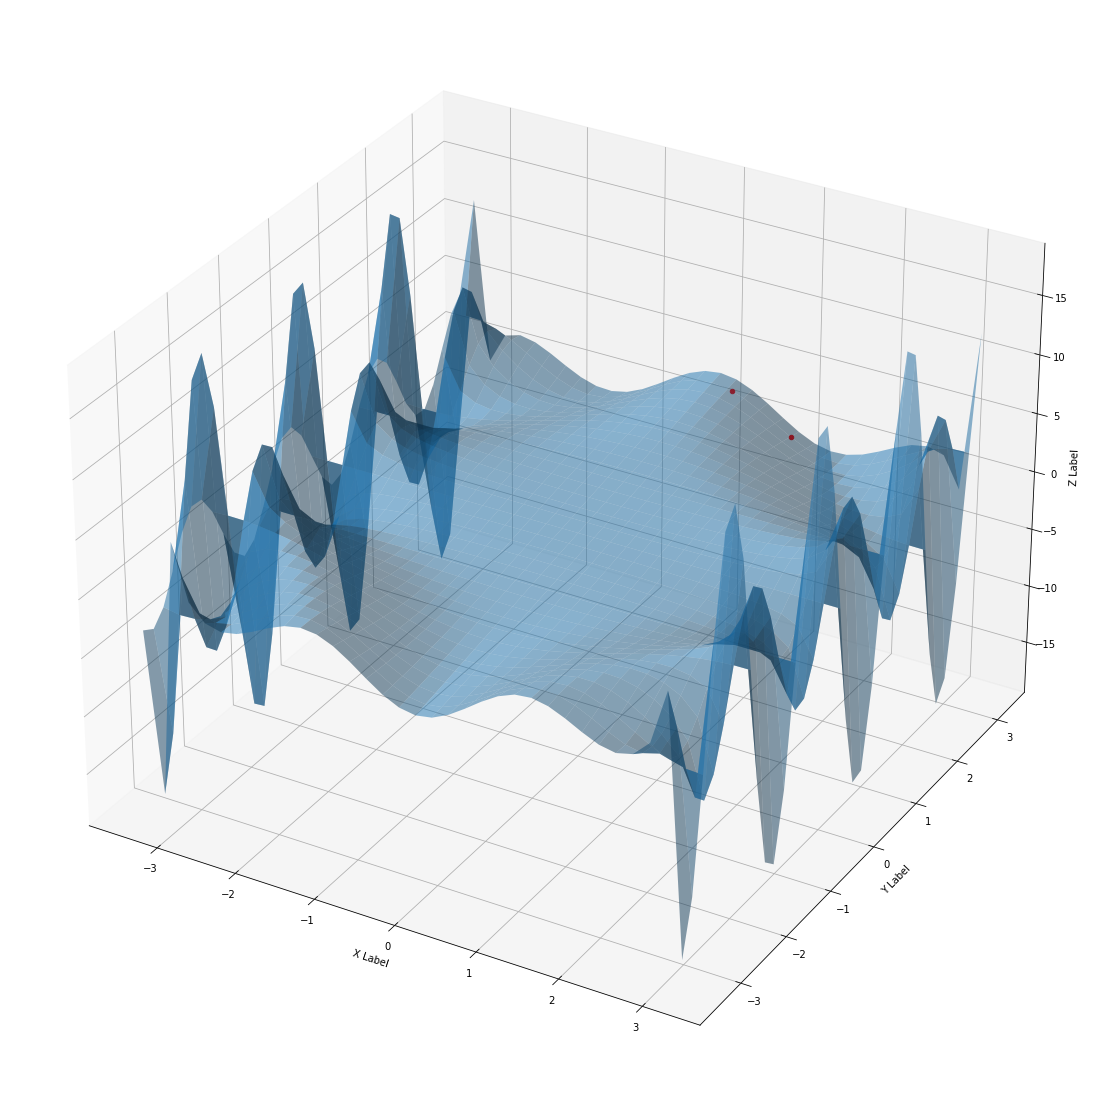

In [9]:
#Alternative plot with the two points in question marked by red dots

#from: https://stackoverflow.com/questions/8722735/i-want-to-use-matplotlib-to-make-a-3d-plot-given-a-z-function
        
def fun(x, y):
    return math.sin(x*y)/math.sin(x)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.4, 3.4, 0.2)
X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.scatter3D(0.25, 3.0, fun(0.25, 3.0), color="red")
ax.scatter3D(1.0, 3.0, fun(1.0, 3.0), color="red")
plt.show()